In [67]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
def cubic_spline_coeffs(xvals,yvals):

    n = xvals.size - 1
    h = xvals[1:]-xvals[0:-1]

    d0 = np.hstack([1,2*(h[0:-1]+h[1:]),1])
    d1 = np.hstack([0,h[1:]])
    dm1 = np.hstack([h[0:-1],0])
    # create the "A" matrix by using the np.diag command
    A = np.diag(d0) + np.diag(d1,1)+ np.diag(dm1,-1)

    
    # create the right-hand-side of A*x = b
    # recall that a_j = y_j
    aVec = yvals
    rhs = np.hstack([0,(3./h[1:])*(aVec[2:]-aVec[1:-1])-(3/h[0:-1])*(aVec[1:-1]-aVec[0:-2]),0])
    
    # use the linalg.solve command to solve Ax = b  
    cVec = np.linalg.solve(A,rhs)

    
    # use the remaining formula to determine d_j and b_j
    dVec = (cVec[1:]-cVec[0:-1])/(3*h)
    bVec = 1/h*(aVec[1:] - aVec[0:-1]) - h/3*(2*cVec[0:-1]+cVec[1:])
    
    # stack all of the coefficients into a matrix so that the coefficients are in the form 
    #            a_0, a_1, ...
    #            b_0, b_1, ...
    #            c_0, c_1, ...
    #            d_0, d_1, ...
    
    SCoeffs = np.vstack([aVec[0:n], bVec[0:n], cVec[0:n], dVec[0:n]])
    return SCoeffs


def spline_eval(sCoeffs,xdata,x):
    S = 0
    for j in range(0,np.size(xdata)-1):
        S_j = 0
        for k in range(0,4):
            S_j += sCoeffs[k,j]*((x-xdata[j])**k)

        if j==np.size(xdata)-2:
            mask = (x>=xdata[j])*(x<=xdata[j+1]);
        else:
            mask = (x>=xdata[j])*(x<xdata[j+1]);
        S += S_j*mask
    return S

In [69]:
f = lambda x: 1/(1 + x**2)
x = np.linspace(-1,1,1000)

In [71]:
x3 = np.linspace(-1,1,3)
y3 = f(x3)

sCoeffs3 = cubic_spline_coeffs(x3,y3)
print(np.shape(sCoeffs3))

(4, 2)


In [73]:
x4 = np.linspace(-1,1,4)
y4 = f(x4)

sCoeffs4 = cubic_spline_coeffs(x4,y4)
print(np.shape(sCoeffs4))

(4, 3)


In [20]:
S_x = spline_eval(sCoeffs10,x10,x)
S20_x = spline_eval(sCoeffs20,x20,x)

In [22]:
print(np.shape(S10_x))
print(np.shape(S20_x))

(1000,)
(1000,)


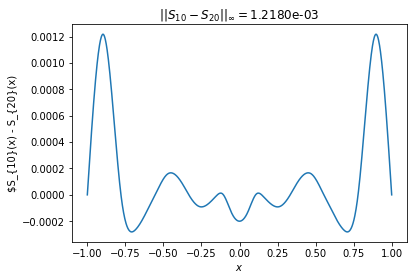

In [35]:
plt.plot(x,S10_x-S20_x)
STR = '%1.4e' % np.linalg.norm(S10_x - S20_x,np.inf)
plt.title(r'$||S_{10} - S_{20}||_\infty = $'+ STR )
plt.xlabel(r'$x$')
plt.ylabel(r'$S_{10}(x) - S_{20}(x)')
plt.show()

In [54]:
nVals = np.arange(4,30)
errOut = np.zeros([len(nVals),2])
for j in range(0,len(nVals)):
    n = nVals[j]
    x0 = np.linspace(-1,1,n)
    x1 = np.linspace(-1,1,n+1)
    S0 = spline_eval(cubic_spline_coeffs(x0,f(x0)),x0,x)
    S1 = spline_eval(cubic_spline_coeffs(x1,f(x1)),x1,x)
    errOut[j,0] = np.linalg.norm(S1 - S0,np.inf)
    errOut[j,1] = np.linalg.norm(f(x) - S0,np.inf)

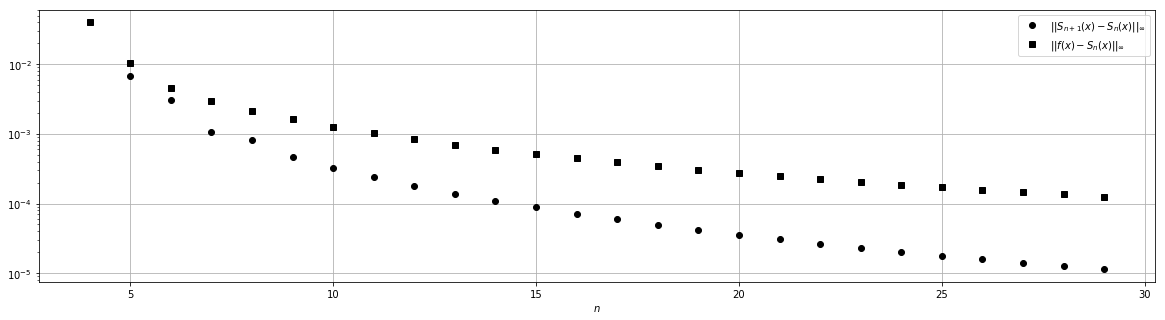

In [66]:
plt.figure(figsize=(20,5))

plt.semilogy(nVals,errOut[:,0],'ko',markersize=6)
plt.semilogy(nVals,errOut[:,1],'ks',markersize=6)
plt.legend([r'$||S_{n+1}(x) - S_n(x)||_\infty$','$||f(x) - S_n(x)||_\infty$'])
plt.xlabel(r'$n$')
plt.grid()